In [1]:

%run ../load_magic/storage.py
%pprint

s = Storage()
df = s.load_csv(csv_name='ynab-reports-income-expense-2022-12-11')

Pretty printing has been turned OFF


In [6]:

flow_dict = df.set_index('Category')['Dec 2022'].to_dict()
df.set_index('Category')

,Oct 2022,Nov 2022,Dec 2022,Average,Total
Category,,,,,
All Income Sources,0.0,199.43,1017.49,405.64,1216.92
Deposit,0.0,100.00,40.00,46.67,140.00
Descriptive Deposit Final Credit for Dispute 51602,0.0,0.00,56.22,18.74,56.22
External Deposit TJX COMPANY - PAYROLL,0.0,265.61,921.27,395.63,1186.88
Manual Balance Adjustment,0.0,-166.18,0.00,-55.39,-166.18
Total Income,0.0,199.43,1017.49,405.64,1216.92
Bills,0.0,-329.00,-166.56,-165.19,-495.56
Giannah CC,0.0,-30.00,0.00,-10.00,-30.00
Jay CC,0.0,0.00,-114.00,-38.00,-114.00


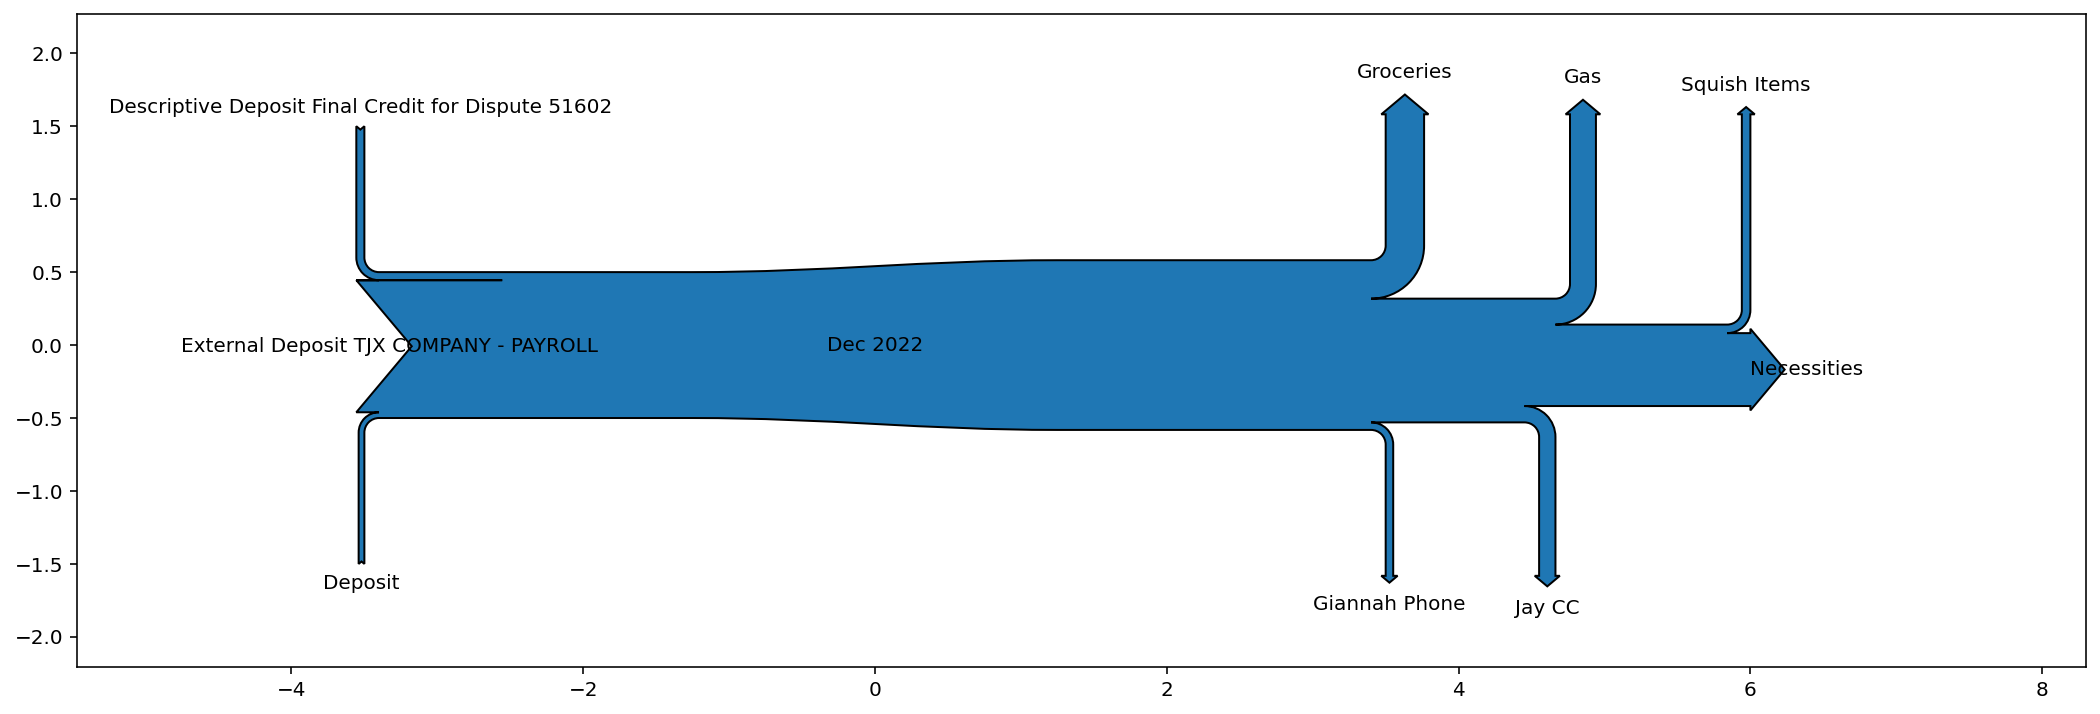

In [33]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
from matplotlib.sankey import Sankey

set_matplotlib_formats('retina')
fig, ax = plt.subplots(figsize=(18, 6))
total = flow_dict['Deposit'] + flow_dict['Descriptive Deposit Final Credit for Dispute 51602'] + flow_dict['External Deposit TJX COMPANY - PAYROLL']
sankey_obj = Sankey(
    ax=ax,
    unit=None,
    gap=1.0,
    patchlabel='Dec 2022',
    flows=[
            flow_dict['Deposit']/total, flow_dict['Descriptive Deposit Final Credit for Dispute 51602']/total,
            flow_dict['External Deposit TJX COMPANY - PAYROLL']/total, flow_dict['Jay CC']/total,
            flow_dict['Giannah Phone']/total, flow_dict['Necessities']/total,
            flow_dict['Groceries']/total, flow_dict['Gas']/total, flow_dict['Squish Items']/total
          ],
    orientations=[
            -1, 1,
            0, -1, -1, 0,
            1, 1, 1
          ],
    labels=[
            'Deposit', 'Descriptive Deposit Final Credit for Dispute 51602',
            'External Deposit TJX COMPANY - PAYROLL', 'Jay CC', 'Giannah Phone', 'Necessities',
            'Groceries', 'Gas', 'Squish Items'
          ],
    trunklength=7.0,
    pathlengths=1.0
).finish()

In [7]:

flow_dict
[f'sankey_obj.{fn}' for fn in dir(sankey_obj) if not fn.startswith('_')]

{'All Income Sources': 1017.49, 'Deposit': 40.0, 'Descriptive Deposit Final Credit for Dispute 51602': 56.22, 'External Deposit TJX COMPANY - PAYROLL': 921.27, 'Manual Balance Adjustment': 0.0, 'Total Income': 1017.49, 'Bills': -166.56, 'Giannah CC': 0.0, 'Jay CC': -114.0, 'Car Payment': 0.0, 'Storage Unit ': 0.0, 'Giannah Phone': -52.56, 'Necessities': -508.48, 'Groceries': -267.97, 'Gas': -180.89, 'Squish Items': -59.62, 'Hidden Categories': 0.0, 'Total Expenses': -675.04, 'Net Income': 342.45}

In [26]:

Sankey?

Init signature:
Sankey(
    ax=None,
    scale=1.0,
    unit='',
    format='%G',
    gap=0.25,
    radius=0.1,
    shoulder=0.03,
    offset=0.15,
    head_angle=100,
    margin=0.4,
    tolerance=1e-06,
    **kwargs,
)
Docstring:     
Sankey diagram.

  Sankey diagrams are a specific type of flow diagram, in which
  the width of the arrows is shown proportionally to the flow
  quantity.  They are typically used to visualize energy or
  material or cost transfers between processes.
  `Wikipedia (6/1/2011) <https://en.wikipedia.org/wiki/Sankey_diagram>`_
Init docstring:
Create a new Sankey instance.

The optional arguments listed below are applied to all subdiagrams so
that there is consistent alignment and formatting.

In order to draw a complex Sankey diagram, create an instance of
:class:`Sankey` by calling it without any kwargs::

    sankey = Sankey()

Then add simple Sankey sub-diagrams::

    sankey.add() # 1
    sankey.add() # 2
    #...
    sankey.add() # n

Finally, create th